In [18]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer

from math import radians, cos, sin, asin, sqrt

In [19]:
gifts_dataset = pd.read_csv("gifts.csv")

rows10= pd.read_csv("Dataset_10.csv")
rows100= pd.read_csv("Dataset_100.csv")
rows1000= pd.read_csv("Dataset_1000.csv")

In [3]:
rows1000

,Unnamed: 0,GiftId,Latitude,Longitude,Weight
0,39933,39934,-9.293420,-64.460513,24.908532
1,38102,38103,-32.264864,-62.345695,1.000000
2,20190,20191,31.849187,60.974392,1.000000
3,80816,80817,73.672012,98.754170,1.000000
4,20432,20433,42.377545,24.118298,7.617600
...,...,...,...,...,...
995,69214,69215,-5.715549,-73.376265,2.704048
996,9944,9945,-81.085845,37.206618,1.000000
997,38624,38625,54.362582,72.865604,13.844780
998,28827,28828,77.283883,-59.959410,35.000914


In [10]:
#Set the trips according to the weight desired!

def assign_trips(giftdf,max_weight=500):
    
    wt=0
    i=1  
    j=0
    for idx,w in giftdf.iterrows():
        wt=wt+giftdf.loc[idx,'Weight']
        if (wt<max_weight):
            giftdf.loc[idx,'TripId']=i
        
        
        else:
            wt=0
            i=i+1
            
            giftdf.loc[idx,'TripId']=i
            
    return giftdf   

In [14]:
def haversine(lat1, lon1, lat2, lon2):
    """ Calculate the great-circle distance between two points on the Earth surface.
    Takes 4 numbers, containing the latitude and longitude of each point in decimal degrees.

    The default returned unit is kilometers.
    """
    # mean earth radius - https://en.wikipedia.org/wiki/Earth_radius#Mean_radius
    avg_earth_radius = 6371.0 # 6371.0088

    # convert all latitudes/longitudes from decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, (lat1, lon1, lat2, lon2))

    # calculate haversine
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    d = sin(dlat * 0.5) ** 2 + cos(lat1) * cos(lat2) * sin(dlon * 0.5) ** 2
    c = 2.0 * avg_earth_radius
    return c  * asin(sqrt(d))

In [15]:
def weighted_trip_length(stops_latitude, stops_longitud, weights):
    north_pole = (90,0)
    sleigh_weight = 10
    dist = 0.0
    
    # Start at the north pole with the sleigh full of gifts.
    prev_lat, prev_lon = north_pole
    prev_weight = np.sum(weights) + sleigh_weight
    for lat, lon, weight in zip(stops_latitude, stops_longitud, weights):
 
        dist += haversine(lat, lon, prev_lat, prev_lon) * prev_weight
        prev_lat, prev_lon = lat, lon
        prev_weight -= weight

    # Last trip back to north pole, with just the sleigh weight
    dist += haversine(north_pole[0], north_pole[1], prev_lat, prev_lon) * sleigh_weight
        
    return dist

In [16]:
def weighted_reindeer_weariness(all_trips, weight_limit = 1000):
    uniq_trips = all_trips.TripId.unique()
    
    if any(all_trips.groupby('TripId').Weight.sum() > weight_limit):
        raise Exception("One of the sleighs over weight limit!")
 
    dist = 0.0
    for t in uniq_trips:
        this_trip = all_trips[all_trips.TripId==t]
        dist += weighted_trip_length(this_trip.Latitude, this_trip.Longitude, this_trip.Weight)
    
    return dist    

In [21]:


def random_search(randomdf,lent):
    start_time = timer()
    global shortest
    total_wrw=[]
    for i in range(1,31):
        random.seed(i)
        #Initial Shuffle of the dataframe
        df_shuffled = randomdf.sample(frac=1)


        best=0
        lent=lent
        #Make an empty list
        new_wrw=[]
        for i in range(lent):
            #Initial Shuffle of the dataframe for each iteration
            print(i)
            df_shuffled = df_shuffled.sample(frac=1)
            df_shuffled.reset_index(drop=True, inplace=True)
            wrw = weighted_reindeer_weariness(df_shuffled)
            wrw=round(wrw)
    
            new_wrw.append(wrw)
        d=min(new_wrw)
        total_wrw.append(d)   
    print(total_wrw)
    shortest=min(total_wrw)
    print("The shortest WRW of this dataset is: "+str(shortest))
    end_time = timer()
    print("WRW = {:.0f}  (Time: {:.2f} seconds)".format(shortest, end_time - start_time))
    return total_wrw



In [22]:
de=assign_trips(gifts_dataset,500)
alle=random_search(de,1000000)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234


KeyboardInterrupt: 

In [ ]:
d2=random_search(de,2)

In [ ]:
dtf=pd.DataFrame(alle,d2,columns=['wr10','wr100'])
dtf
# sns.set_theme(style="whitegrid")

# ax = sns.boxplot(x=dtf)

In [28]:
#A function defined to calculate the exponential
def f(wrw_s, wrw_s_apos, T):
    answer = np.exp((1/T) * ((wrw_s - wrw_s_apos)/ wrw_s))
    return answer

#Simulated Annealing function defined here
def simulated_annealing_test(sadf,n_iterations):
    temperature= 1
    alpha = 0.50
    n_iterations=n_iterations
    n=0
    #Initializinf the initial WRW as 's'
    initial_shuffle=sadf.sample(frac=1)
    s = weighted_reindeer_weariness_sa(initial_shuffle)
    s =round(s)

    while(n<n_iterations):
        new_s = weighted_reindeer_weariness_sa(sadf)
        new_s=round(new_s)
        r = random.uniform(0, 1)
        e = f(s, new_s, temperature)
#         print("Random s is: "+str(s))
#         print("new ss WRW is: "+str(new_s))
        if (new_s < s) or (r<e):
            s = new_s
#         print("Random WRW is vbvb: "+str(s))
        temperature = alpha * temperature
        n=n+1
    return s

In [11]:
#Modified 'weighted_reindeer_weariness' fucntion with Random Search Shuffle and NM1 neighbourhood move.
def weighted_reindeer_weariness_sa(all_trips, weight_limit = 1000):
    uniq_trips = all_trips.TripId.unique()
    
    if any(all_trips.groupby('TripId').Weight.sum() > weight_limit):
        raise Exception("One of the sleighs over weight limit!")
    #Initial Shuffle
    all_trips = all_trips.sample(frac=1)
    all_trips.reset_index(drop=True, inplace=True)
     
    
    dist = 0.0
    for t in uniq_trips:
        
        this_trip = all_trips[all_trips.TripId==t]
        #NM1 Neighbourhood move
        temp=this_trip.iloc[0].copy()
        this_trip.iloc[0]=this_trip.iloc[-1].copy()
        this_trip.iloc[-1]=temp.copy()
        
        dist += weighted_trip_length(this_trip.Latitude, this_trip.Longitude, this_trip.Weight)
    
    return dist

In [12]:
#Function defined to start the iteration for Simulated Annealing with NM1
def sa_nm(randomdf,lent):
    global shortest
    start_time = timer()
    total_wrw=[]
    for i in range(1,31):
        random.seed(i)
        df_shuffled = randomdf.sample(frac=1)


        best=0
        lent=lent
        new_wrw=[]
        df_shuffled.reset_index(drop=True, inplace=True)
        wrw = simulated_annealing_test(df_shuffled,lent)

    
        new_wrw.append(wrw)
        d=min(new_wrw)
        total_wrw.append(d)
        shortest=min(total_wrw)
    print(total_wrw)   
    end_time = timer()
    print("WRW = {:.0f}  (Time: {:.2f} seconds)".format(shortest, end_time - start_time))
    return total_wrw

In [20]:
dev=assign_trips(rows1000,500)
#alpha=.98
sad=sa_nm(dev,100)


[2603100695, 2362139451, 2566519253, 2535602131, 2442903030, 2624434175, 2441929802, 2611746431, 2527451294, 2570253172, 2567523638, 2538415834, 2463306657, 2607148911, 2373910205, 2655676424, 2604842751, 2553814504, 2526783313, 2468526581, 2504220915, 2499402458, 2552748356, 2505629769, 2516601390, 2478558499, 2562755473, 2572948517, 2632299170, 2468747379]
WRW = 2362139451  (Time: 199.76 seconds)


In [23]:
#alpha=.95
s2=sa_nm(dev,100)

[2467496632, 2465470729, 2513904978, 2495148228, 2398080083, 2501688758, 2455072781, 2469930628, 2401923002, 2408324803, 2417844473, 2478708987, 2459870614, 2321687690, 2406367360, 2455183270, 2439893601, 2394947779, 2448730022, 2421744185, 2378754495, 2465620348, 2482496854, 2468831101, 2413666713, 2470257469, 2413340037, 2435010864, 2444809528, 2406289351]
WRW = 2321687690  (Time: 199.63 seconds)


In [25]:
#alpha=.90
s3=sa_nm(dev,100)

[2428093147, 2380417661, 2377415706, 2352491581, 2388156987, 2347883331, 2375365875, 2367712962, 2375537712, 2411921057, 2419421829, 2373097691, 2390086422, 2424774073, 2343663859, 2388951533, 2391889683, 2414984768, 2388339242, 2368288808, 2400870501, 2428665277, 2359518350, 2365960314, 2429303400, 2390755048, 2363576076, 2385127771, 2400609894, 2330345762]
WRW = 2330345762  (Time: 208.54 seconds)


In [27]:
#alpha=.80
s4=sa_nm(dev,100)

C:\Users\sumit\AppData\Local\Temp/ipykernel_8348/1829407124.py:3: RuntimeWarning: overflow encountered in exp
  answer = np.exp((1/T) * ((wrw_s - wrw_s_apos)/ wrw_s))


[2380793843, 2400490148, 2359386885, 2365849645, 2393894399, 2409803140, 2366915667, 2352653066, 2419467049, 2410740121, 2368135677, 2377761304, 2386431035, 2420214196, 2361166091, 2354224010, 2386749131, 2390849961, 2340696397, 2358880093, 2353129944, 2386568040, 2392441121, 2398223612, 2399210363, 2375568122, 2360650191, 2378488543, 2355822903, 2369037676]
WRW = 2340696397  (Time: 223.33 seconds)


In [29]:
#alpha=.50
s5=sa_nm(dev,100)

C:\Users\sumit\AppData\Local\Temp/ipykernel_8348/826027304.py:3: RuntimeWarning: overflow encountered in exp
  answer = np.exp((1/T) * ((wrw_s - wrw_s_apos)/ wrw_s))


[2397446088, 2365467547, 2386552080, 2393456483, 2405849198, 2358670766, 2406774575, 2347610867, 2392160696, 2346260012, 2417336520, 2394153517, 2377222596, 2393811716, 2357459221, 2389395002, 2405777459, 2424432965, 2314468057, 2367980394, 2425863965, 2397291350, 2368311960, 2373915271, 2418728646, 2395728467, 2392622374, 2321633679, 2386917501, 2402867449]
WRW = 2314468057  (Time: 219.12 seconds)


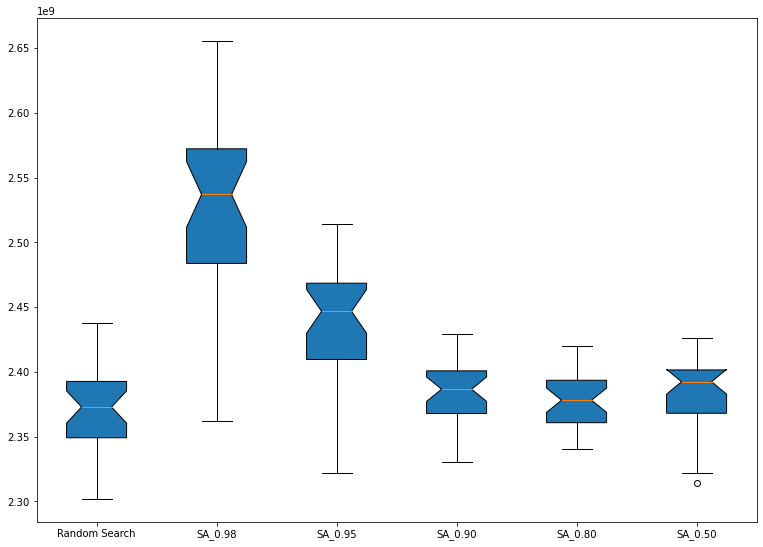

In [30]:

data = [alle,sad,s2,s3,s4,s5]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])


 
# Creating plot
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 1)

ax.set_xticklabels(['Random Search', 'SA_0.98',
                    'SA_0.95', 'SA_0.90','SA_0.80','SA_0.50'])


 
# show plot
plt.show()

In [5]:
 def weighted_reindeer_weariness_sa_nm(all_trips, weight_limit = 1000):
    
    
    all_trips = all_trips.sample(frac=1)
    all_trips.reset_index(drop=True, inplace=True)
    total_trips=max(all_trips['TripId'])
    
    if total_trips>2:
        
    
        trip1=random.randint(1,total_trips)
        trip2=random.randint(1,total_trips)
        trip3=random.randint(1,total_trips)
    
        while(trip1==trip2):
            trip2=random.randint(1,total_trips)
            
        while(trip1==trip3) or (trip2==trip3):
            trip3=random.randint(1,total_trips)
    
#         print(trip1,trip2,trip3)
    
        trip1_df=all_trips[all_trips.TripId==trip1]
        trip2_df=all_trips[all_trips.TripId==trip2]
        trip3_df=all_trips[all_trips.TripId==trip3]
    
    
    
        i=random.randint(1,len(trip1_df))
        j=random.randint(1,len(trip2_df))
        k=random.randint(1,len(trip3_df))
    
    
        gift_t1=trip1_df[i:]["GiftId"]
        gift_t2=trip2_df[j:]["GiftId"]
        gift_t3=trip3_df[k:]["GiftId"]
    
        for g in gift_t1:
            all_trips.loc[all_trips.GiftId==g,"TripId"]=trip2
    
        for g in gift_t2:
            all_trips.loc[all_trips.GiftId==g,"TripId"]=trip3
    
        for g in gift_t3:
            all_trips.loc[all_trips.GiftId==g,"TripId"]=trip1
        
        
        
        trip1_df=all_trips[all_trips.TripId==trip1]
        trip2_df=all_trips[all_trips.TripId==trip2]
        trip3_df=all_trips[all_trips.TripId==trip3]
    
    
# #     print(all_trips.groupby('TripId').Weight.sum() > weight_limit)
#     if any(all_trips.groupby('TripId').Weight.sum() > weight_limit):
#         raise Exception("One of the sleighs over weight limit!")
    
    
    
    
    uniq_trips = all_trips.TripId.unique()
    dist = 0.0
    for t in uniq_trips:
        
        this_trip = all_trips[all_trips.TripId==t]
        
        
        temp=this_trip.iloc[0].copy()
        this_trip.iloc[0]=this_trip.iloc[-1].copy()
        this_trip.iloc[-1]=temp.copy()
        
        dist += weighted_trip_length(this_trip.Latitude, this_trip.Longitude, this_trip.Weight)
    
    return dist
        

In [27]:


import math
from random import randrange


def f(wrw_s, wrw_s_apos, T):
    answer = np.exp((1/T) * ((wrw_s - wrw_s_apos)/ wrw_s))
    return answer

def simulated_annealing_nm6(sadf,n_iterations):
    temperature= 1
    alpha = 0.80
    n_iterations=n_iterations
    n=0

    s = weighted_reindeer_weariness_sa_nm(sadf)
    s =round(s)

    while(n<n_iterations):
        print(n)
        new_s = weighted_reindeer_weariness_sa_nm(sadf)
        new_s=round(new_s)
        r = random.uniform(0, 1)
        e = f(s, new_s, temperature)

        if (new_s < s) or (r<e):
            s = new_s
        
        temperature = alpha * temperature
        n=n+1
    return s


In [25]:
def sa_nm_with_nm6(randomdf,lent):
    global shortest
    start_time = timer()
    total_wrw=[]
    for i in range(1,31):
        random.seed(i)
        df_shuffled = randomdf.sample(frac=1)


        best=0
        lent=lent
        new_wrw=[]
        df_shuffled.reset_index(drop=True, inplace=True)
        wrw = simulated_annealing_nm6(df_shuffled,lent)
    
    
        new_wrw.append(wrw)
        d=min(new_wrw)
        total_wrw.append(d) 
        shortest=min(total_wrw)
    print(total_wrw)   
    end_time = timer()
    print("WRW = {:.0f}  (Time: {:.2f} seconds)".format(shortest, end_time - start_time))
    return total_wrw

In [28]:
new_df=assign_trips(gifts_dataset,500)
sad6=sa_nm_with_nm6(new_df,580)



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

C:\Users\sumit\AppData\Local\Temp/ipykernel_5880/3936795461.py:6: RuntimeWarning: overflow encountered in exp
  answer = np.exp((1/T) * ((wrw_s - wrw_s_apos)/ wrw_s))


298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547


In [29]:
sad6

[248966456460]

In [ ]:
#alpha=.95
sn2=sa_nm_with_nm6(new_df,1000)

In [ ]:
#alpha=.90
sn3=sa_nm_with_nm6(new_df,1000)


In [ ]:
#alpha=.80
sn4=sa_nm_with_nm6(new_df,1000)


In [ ]:
#alpha=.50
sn5=sa_nm_with_nm6(new_df,1000)

In [ ]:
data1 = [alle,sad6,sn2,sn3,sn4,sn5]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])


 
# Creating plot
bp = ax.boxplot(data1, patch_artist = True,
notch ='True', vert = 1)

ax.set_xticklabels(['Random Search', 'SA_NM6_0.98',
                    'SA_NM6_0.95', 'SA_NM6_0.90','SA_NM6_0.80','SA_NM6_0.50'])


 
# show plot
plt.show()